<a href="https://colab.research.google.com/github/4884sneha/Project1/blob/master/original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT**

The retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.The department wants to build a model that will help in identifying the potential customers who have higher probability of purchasing the loan. This will increase the the success ratio while at the same time reduce the cost of the campaign.

TARGET:


1)To sell more Personal Loan products to bank customers.

2)To devise campaigns to better taret marketing to increase success ratio with a minimal budget.

3)To identify the potential customers who have a higher probability of the purchasing the laon.

1.1 Importing the required libraries 

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)


In [153]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (4).csv


In [154]:
import io
!pip install -q xlrd
#df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')



In [155]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [156]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


There are 12 features:
AGE:Customer's age    
EXPERIENCE:number of years of professional experience   
INCOME:annual income of the customer  
ZIP CODE:home address ZIP code  
FAMILY:family size of customer  
CCAVG:average spending on credit cards per month  
EDUCATION:education level-1)undergrad 2)graduate 3)advance  
MORTAGAGE:value of house montgage if any   
SECURITIES ACCOUNT:does the customer has a security acccount the with bank?      
CD ACCOUNT:does the customer have certificate deposite?
ONLINE:does the customer use internet banking facility? 
CREDIT:does the customer uses credit card issued by UniversalBank                           
PERSONAL LOAN:did the customer accept the personal loan offered in last campaign?

In [157]:
#display how many null values are there
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

1.2 Checking the types of data and basic summary stats


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [159]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**2. Dropping irrelevant columns**                   
In Machine Learning, we need to separate signal from noise.Hence the id column is dropped because it doesn't have signal.Also experience value have some faulty value as negative.

In [160]:
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [161]:
df.Online.sum()

2984

In [162]:
df.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [163]:
df = df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [164]:
df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [165]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [166]:
df = df.dropna()
df.count()


Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [167]:
print(df.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**3)EDA**

In [168]:
#number of unique in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [169]:
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [170]:
#number of people with zero mortgage
#there are 3462 people out of 5000 with zero mortgage(making it skew)
(df.Mortgage==0).sum()

3462

In [171]:
#number of people with zero credit card spending per month
#there are avg 106 people with zero credit card spending
(df.CCAvg==0).sum()

106

In [172]:
#value counts for all categorical column
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [173]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [174]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [175]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [176]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [177]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**UNIVARIATE ANALSIS**

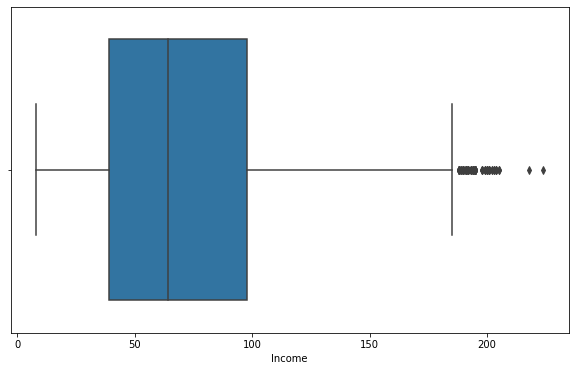

In [178]:
sns.boxplot(x=df['Income'])

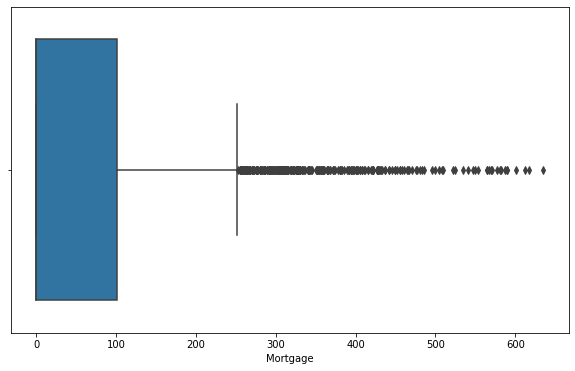

In [179]:
sns.boxplot(x=df['Mortgage'])

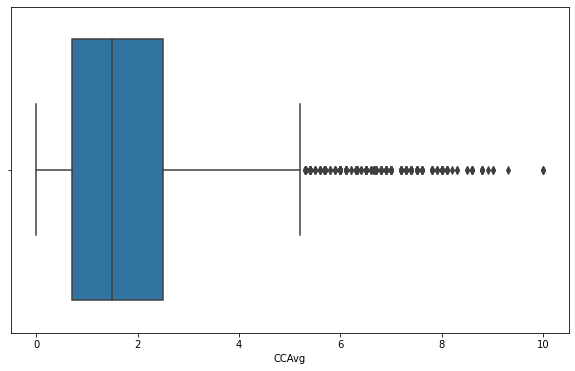

In [180]:
sns.boxplot(x=df['CCAvg'])

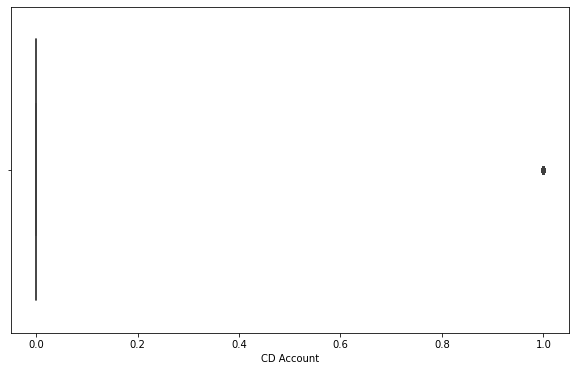

In [181]:
sns.boxplot(x=df['CD Account'])

In [182]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age                     20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [183]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR ))).any(axis = 1)]
df.shape

(3645, 12)

In [184]:
counts = df['Income'].value_counts()*100/sum(df['Income'].value_counts())
print(counts)

41     2.057613
44     2.030178
38     2.030178
39     1.947874
42     1.920439
         ...   
185    0.054870
153    0.027435
169    0.027435
171    0.027435
164    0.027435
Name: Income, Length: 139, dtype: float64


In [185]:
popular_labels = counts.index[:10]

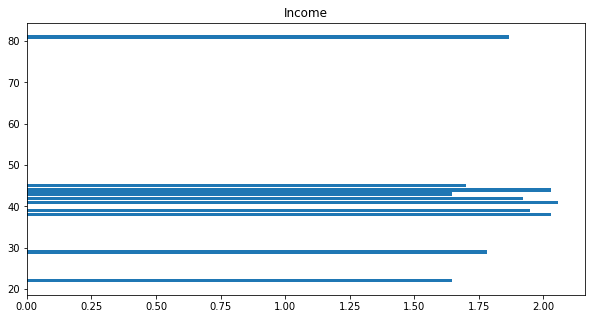

In [186]:
plt.figure(figsize = (10,5))
plt.barh(popular_labels, width = counts[:10])
plt.title('Income')
plt.show()

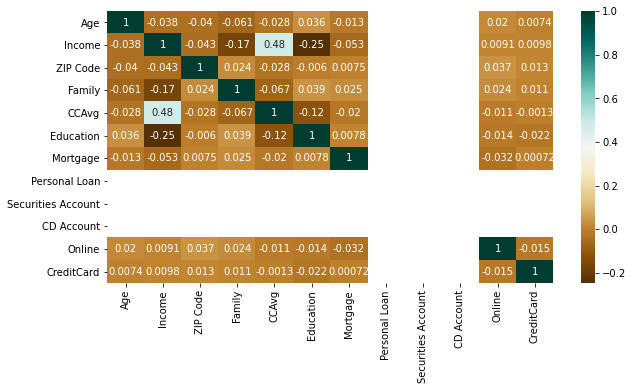

In [187]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap = "BrBG",annot = True)

In [188]:
df.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.038458,-0.040376,-0.061385,-0.027979,0.036083,-0.013367,NaN,NaN,NaN,0.020064,0.007383
Income,-0.038458,1.000000,-0.042888,-0.167272,0.476446,-0.245254,-0.052715,NaN,NaN,NaN,0.009050,0.009809
ZIP Code,-0.040376,-0.042888,1.000000,0.023618,-0.027688,-0.006008,0.007550,NaN,NaN,NaN,0.037397,0.013136
Family,-0.061385,-0.167272,0.023618,1.000000,-0.066996,0.039488,0.024972,NaN,NaN,NaN,0.024214,0.011086
CCAvg,-0.027979,0.476446,-0.027688,-0.066996,1.000000,-0.117809,-0.020246,NaN,NaN,NaN,-0.011457,-0.001340
Education,0.036083,-0.245254,-0.006008,0.039488,-0.117809,1.000000,0.007804,NaN,NaN,NaN,-0.014213,-0.021804
Mortgage,-0.013367,-0.052715,0.007550,0.024972,-0.020246,0.007804,1.000000,NaN,NaN,NaN,-0.031559,0.000717
Personal Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


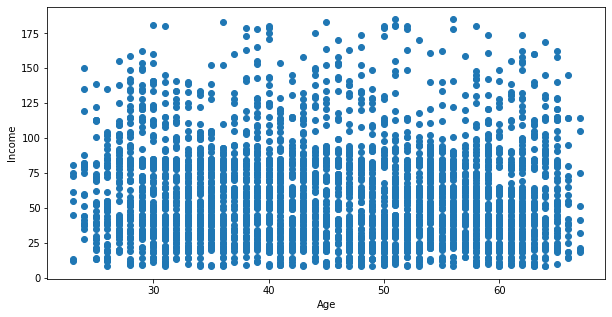

In [189]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 2 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3645 non-null   int64  
 1   Income              3645 non-null   int64  
 2   ZIP Code            3645 non-null   int64  
 3   Family              3645 non-null   int64  
 4   CCAvg               3645 non-null   float64
 5   Education           3645 non-null   int64  
 6   Mortgage            3645 non-null   int64  
 7   Personal Loan       3645 non-null   int64  
 8   Securities Account  3645 non-null   int64  
 9   CD Account          3645 non-null   int64  
 10  Online              3645 non-null   int64  
 11  CreditCard          3645 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 370.2 KB


Text(0.5, 0, 'Age')

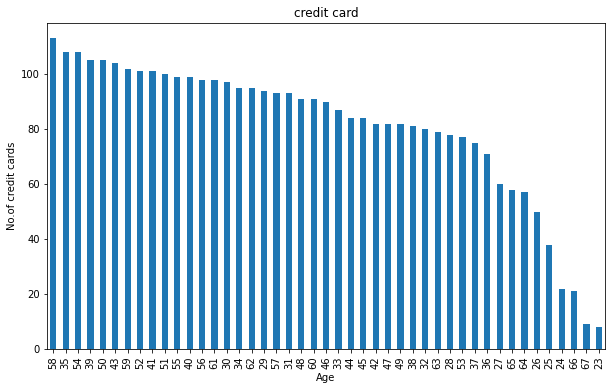

In [191]:
df['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

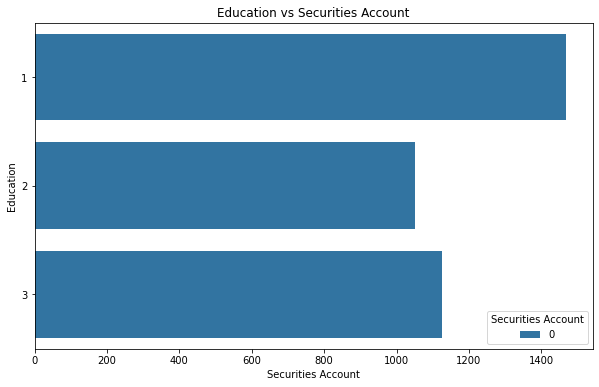

In [192]:
sns.countplot(y='Education', data = df , hue = 'Securities Account')
plt.title('Education vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

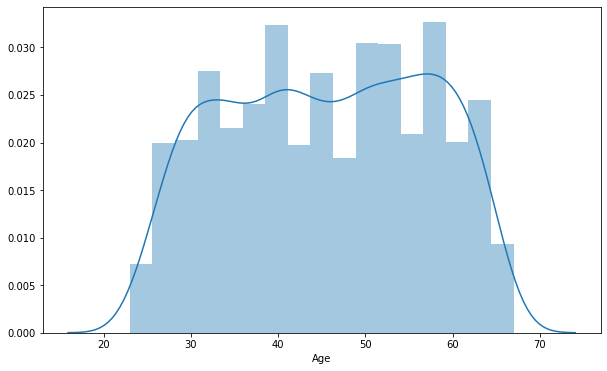

In [193]:
#Univariant analysis
#age seems to have symmetric distribution
sns.distplot(df.Age);

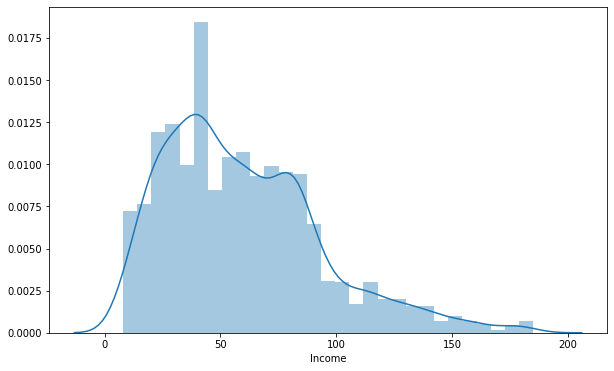

In [194]:
#Income is right skewed distribution
sns.distplot(df.Income);

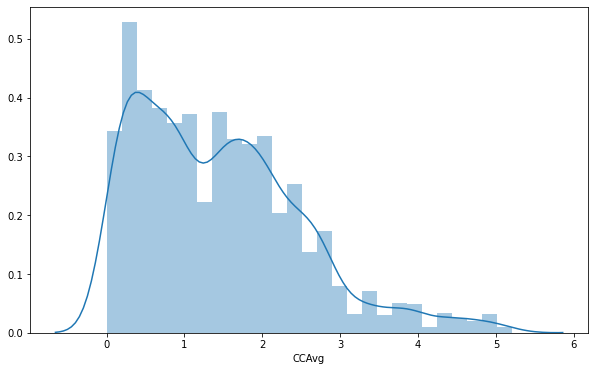

In [195]:
#Credit card average is right skewed distribution
sns.distplot(df.CCAvg);

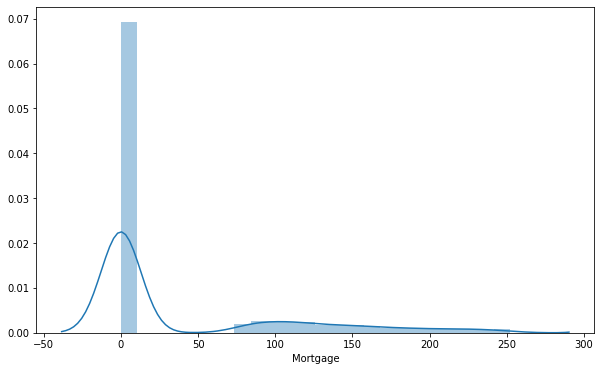

In [196]:
#Mortgage column seems highly skewed
sns.distplot(df.Mortgage);

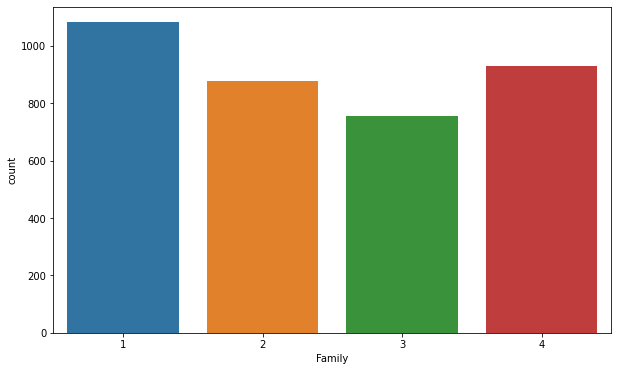

In [197]:
sns.countplot(df.Family);

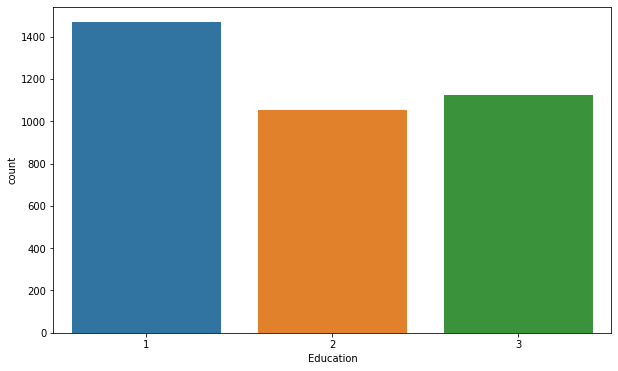

In [198]:
sns.countplot(df.Education);

**BIVARIANT ANALYSIS**

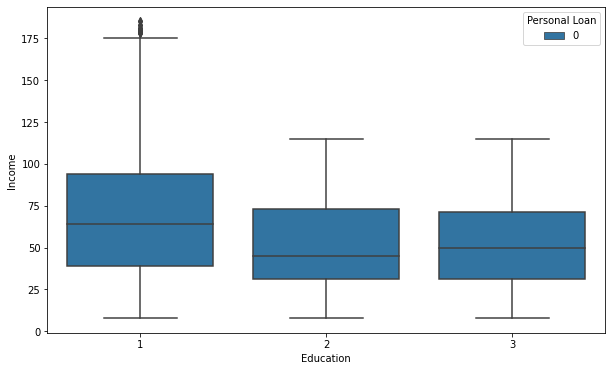

In [199]:
#It seems that the customers who has more income is granted loan access at each education level
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

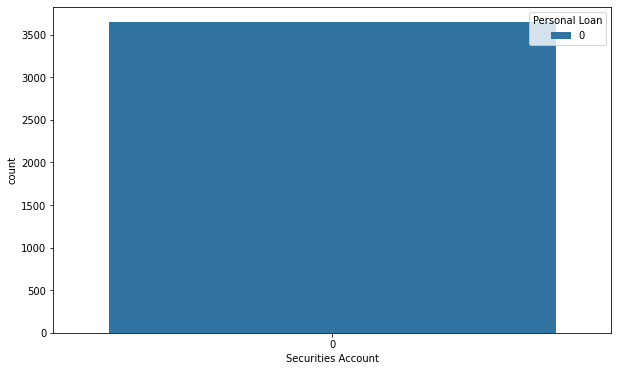

In [200]:
#Majority of people having securities account don't have personal loan
sns.countplot(x="Securities Account",data=df,hue="Personal Loan");

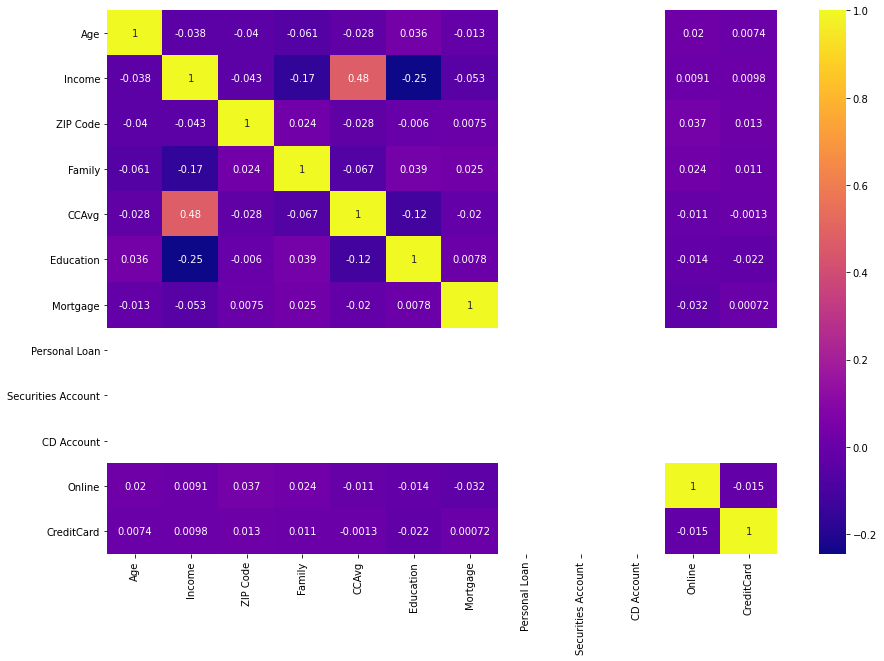

In [201]:
#after dropping Experience column earlier doesn't seem to be significant correlation between other variables
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True);

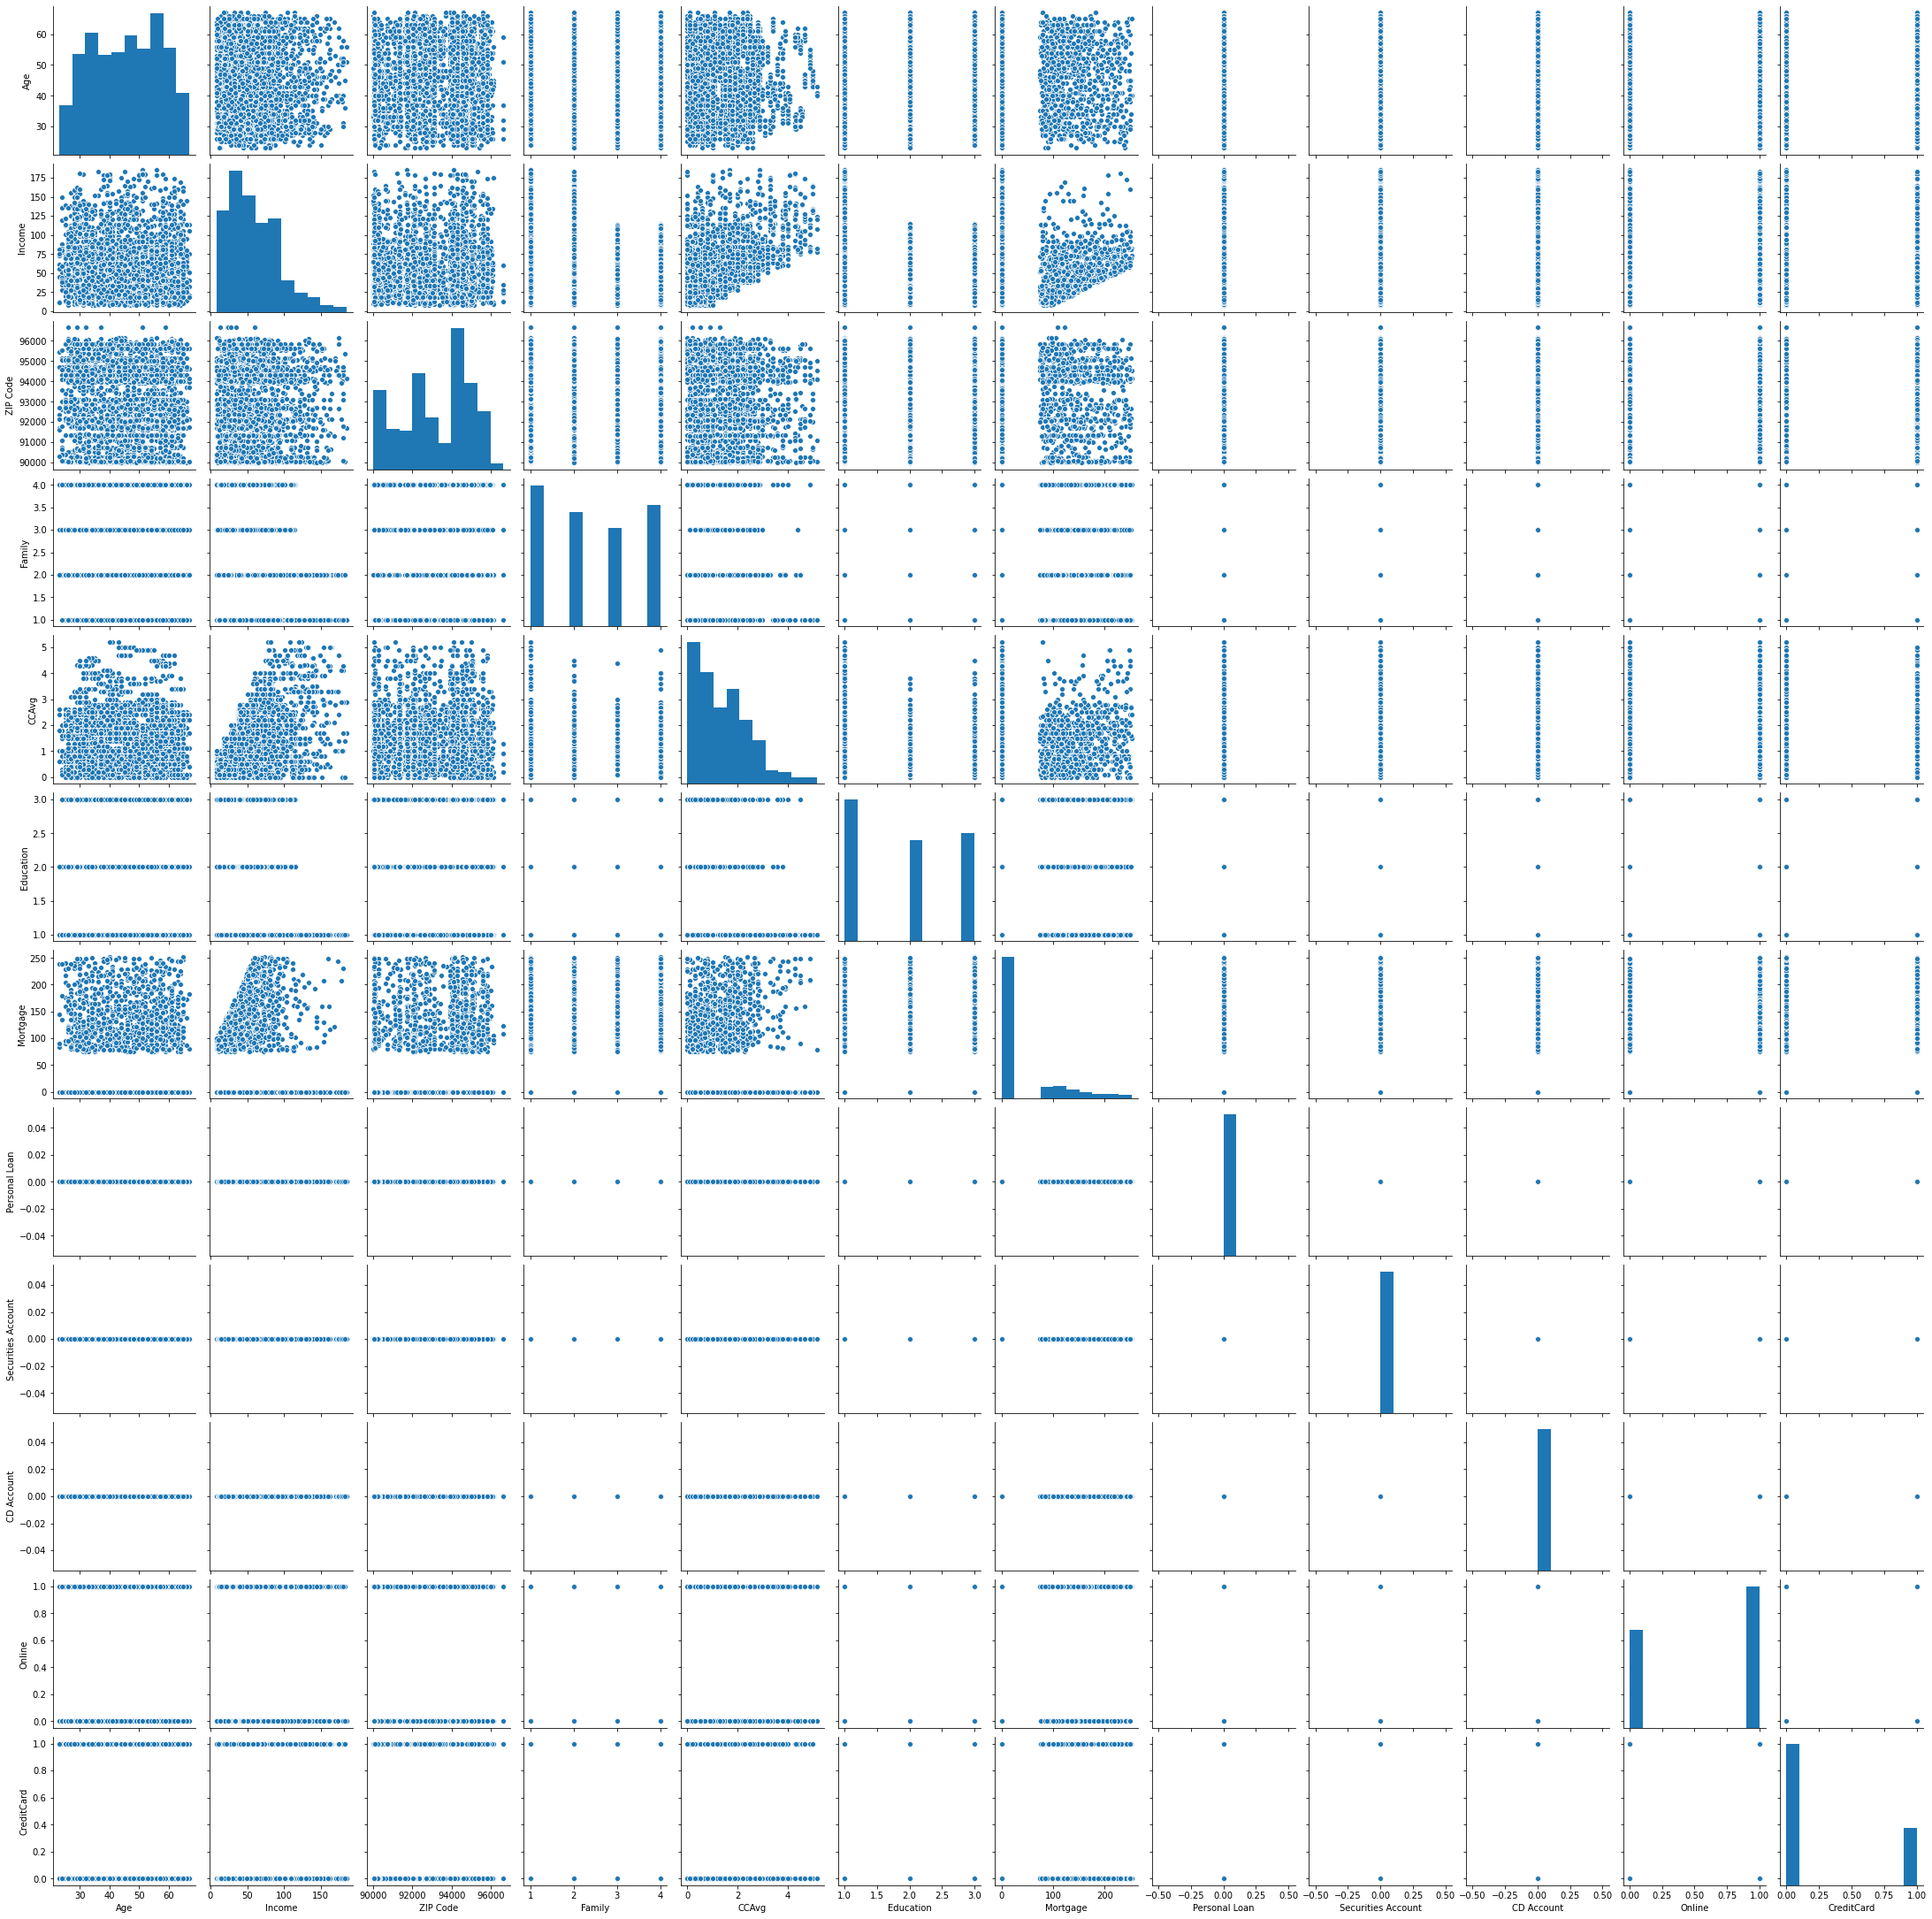

In [202]:
sns.pairplot(df)

In [203]:
data_X=df.loc[:,df.columns!="Personal Loan"]
data_Y=df[["Personal Loan"]]

**Transformation of feature Variables**

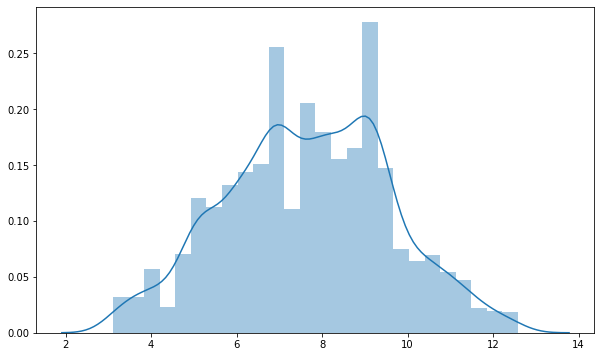

In [204]:
#Normalising Income
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

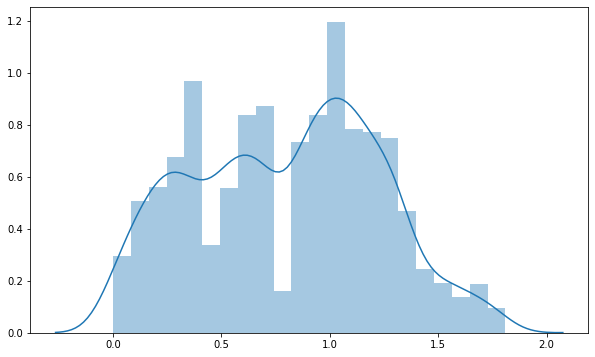

In [205]:
#Normalising Credit Card Average
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [206]:
data_X["Mortage_Int"]=pd.cut(data_X["Mortgage"],
                             bins=[0,100,200,300,400,500,600,700],
                             include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

In [207]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortage_Int
2,39,11,94720,1,1.0,1,0,0,0,0,"(-0.001, 100.0]"
3,35,100,94112,1,2.7,2,0,0,0,0,"(-0.001, 100.0]"
4,35,45,91330,4,1.0,2,0,0,0,1,"(-0.001, 100.0]"
5,37,29,92121,4,0.4,2,0,0,1,0,"(100.0, 200.0]"
6,53,72,91711,2,1.5,2,0,0,1,0,"(-0.001, 100.0]"


**5)SPLITTING THE DATA USING STRATIFIED SAMPLING**

In [208]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

In [209]:
train_X.reset_index(drop=True,inplace=True);
test_X.reset_index(drop=True,inplace=True);
train_Y.reset_index(drop=True,inplace=True);
test_Y.reset_index(drop=True,inplace=True);

In [210]:
train_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortage_Int
0,64,82,94025,4,3.4,2,0,0,1,0,"(-0.001, 100.0]"
1,53,72,91711,2,1.5,2,0,0,1,0,"(-0.001, 100.0]"
2,35,41,90024,4,1.2,2,0,0,1,0,"(-0.001, 100.0]"
3,54,81,92096,2,0.0,3,0,0,1,0,"(-0.001, 100.0]"
4,44,122,94305,1,0.3,1,0,0,1,0,"(-0.001, 100.0]"


In [211]:
x=df[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=df['Personal Loan'].values

In [212]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [213]:
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(2551, 11) (1094, 11) (2551, 1) (1094, 1)


**LINEAR REGRESSION**

In [214]:
cols=['a','b','c','d','e','f','g','h','i','j','k','l','m']

In [215]:
df =pd.read_csv('Bank_Personal_Loan_Modelling.csv')


In [216]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [217]:
df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [218]:
features=['Age','Income','CCAvg','Education']

In [219]:
y=df['Personal Loan']

In [220]:
x=df[features]

In [221]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,random_state=0)

In [222]:
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
model=LogisticRegression()

In [225]:
model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:

y_predict=model.predict(test_X)

In [227]:
print(y_predict)

[0 0 0 ... 0 0 0]


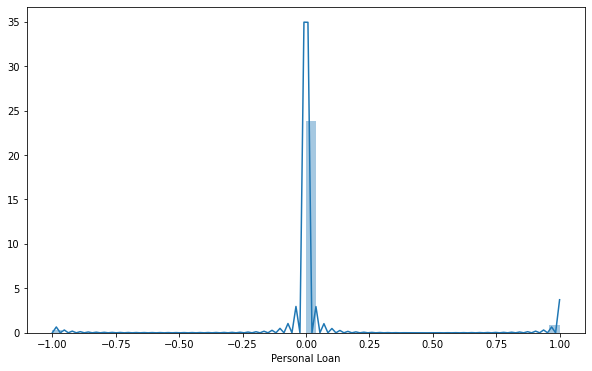

In [228]:
sns.distplot((test_Y - y_predict),bins = 50)

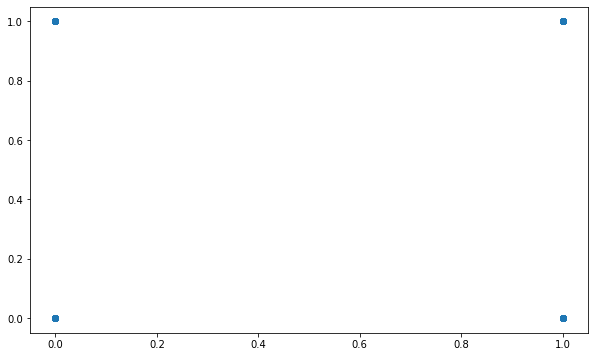

In [229]:
plt.scatter(test_Y,y_predict)

In [230]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.0464
Root Mean Squared Error 0.21540659228538014
R2 Score 0.4121748718946616


In [231]:
print(metrics.accuracy_score(test_Y,y_predict))

0.9536


In [232]:
from sklearn.metrics import classification_report

In [233]:
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1142
           1       0.82      0.59      0.69       108

    accuracy                           0.95      1250
   macro avg       0.89      0.79      0.83      1250
weighted avg       0.95      0.95      0.95      1250



In [234]:
print(metrics.recall_score(test_Y,y_predict))

0.5925925925925926


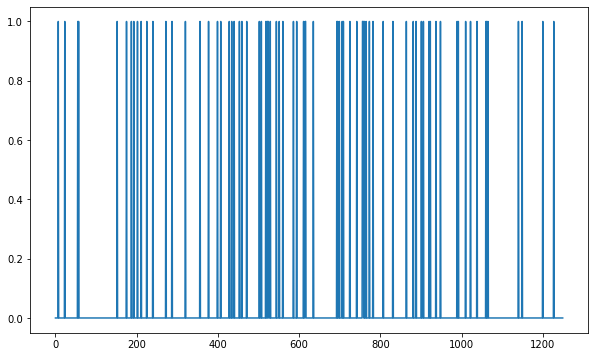

In [235]:
plt.plot(y_predict)

In [236]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(train_X)
poly_reg.fit(x_poly,train_Y)
line_reg2 = LogisticRegression()
line_reg2.fit(x_poly,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

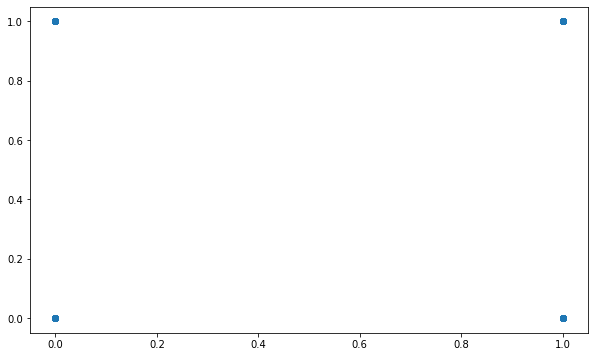

In [237]:
y_predict = line_reg2.predict(poly_reg.fit_transform(test_X))
plt.scatter(test_Y,y_predict)

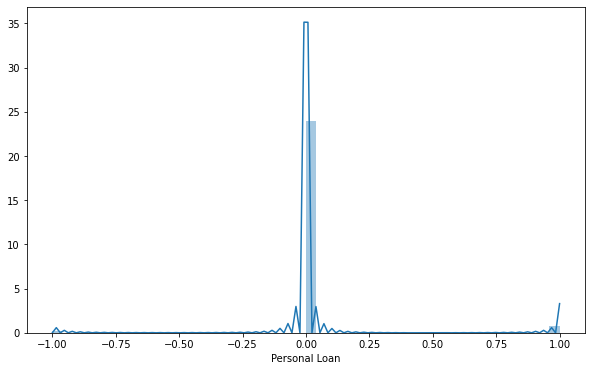

In [238]:
sns.distplot((test_Y-y_predict),bins = 50)

In [239]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.0416
Root Mean Squared Error 0.2039607805437114
R2 Score 0.47298436790555864


**RANDOM FOREST**

In [240]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
y_pred=clf.predict(test_X)

In [242]:
print("MAE",metrics.mean_absolute_error(test_Y,y_pred))
print("R2s score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE 0.0272
R2s score: 0.6554128559382499
Accuracy score for test data 0.9728


In [243]:
print("Accuracy score for train data:",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data: 0.9394666666666667


In [244]:
from sklearn.metrics import classification_report
print (classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1142
           1       0.94      0.73      0.82       108

    accuracy                           0.97      1250
   macro avg       0.96      0.86      0.90      1250
weighted avg       0.97      0.97      0.97      1250



In [245]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(test_Y,y_pred))

[[1137    5]
 [  29   79]]


**NAIVE BAYES**

In [246]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_X,train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [247]:
y_pred=model.predict(test_X)

In [248]:
print("MAE",metrics.mean_absolute_error(test_Y,y_pred))
print("R2s score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE 0.0808
R2s score: -0.023626516183434143
Accuracy score for test data 0.9192


In [249]:
print("Accuracy score for train data:",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data: 0.9064


In [250]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(test_Y,y_pred))

[[1088   54]
 [  47   61]]


In [251]:
from sklearn.metrics import classification_report
print (classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1142
           1       0.53      0.56      0.55       108

    accuracy                           0.92      1250
   macro avg       0.74      0.76      0.75      1250
weighted avg       0.92      0.92      0.92      1250



**KNN algorithm**

In [252]:
from sklearn.neighbors import KNeighborsClassifier
neig=KNeighborsClassifier(n_neighbors=3)
neig.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [253]:
y_pred=neig.predict(test_X)

In [254]:
print("MAE",metrics.mean_absolute_error(test_Y,y_pred))
print("R2s score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE 0.0768
R2s score: 0.02704806382564673
Accuracy score for test data 0.9232


In [255]:
print("Accuracy score for train data:",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data: 0.9064


In [256]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(test_Y,y_pred))

[[1108   34]
 [  62   46]]


In [257]:
from sklearn.metrics import classification_report
print (classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1142
           1       0.57      0.43      0.49       108

    accuracy                           0.92      1250
   macro avg       0.76      0.70      0.72      1250
weighted avg       0.91      0.92      0.92      1250



**NEUTRAL NETWORK**

In [258]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
mlp.fit(train_X,train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [259]:
y_pred=mlp.predict(test_X)

In [260]:
print("MAE",metrics.mean_absolute_error(test_Y,y_pred))
print("R2s score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE 0.0432
R2s score: 0.45271453590192634
Accuracy score for test data 0.9568


In [261]:
print("Accuracy score for train data:",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data: 0.9064


In [262]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(test_Y,y_pred))

[[1141    1]
 [  53   55]]


In [263]:
from sklearn.metrics import classification_report
print (classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1142
           1       0.98      0.51      0.67       108

    accuracy                           0.96      1250
   macro avg       0.97      0.75      0.82      1250
weighted avg       0.96      0.96      0.95      1250



**CONCLUSION**

The various results of this dproject are:                              
1)We  made the model to predict whether a person will take personal loan or not.           
2)ID and ZIP code were notcontributing factors for a person so it was dropped.  
3)We found that age and experience are highly correlated.         


**RANDOM FOREST**


Accuracy score:97.36%

Confusion matrix:[[1137    5]
 [  28   80]]



**NAIVE BAYES**

Accuracy score:91.92%

Confusion matrix:[[1088   54]
 [  47   61]]

**KNN algorithm**


Accuracy score:92.32%

Confusion matrix:[[1108   34]
 [  62   46]]

**NEUTRAL NETWORK**


Accuracy score:96.64%

Confusion matrix:[[1136    6]
 [  36   72]]

